## Omar Al-Naimi

### This project is for developing logistic regression model for predicting patients' readmission within 30 days after discharge.

In [437]:
# importing data set = Hospital-Readmission.csv
import pandas as pd
my_dataset = pd.read_csv ('C:\\Users\\omar_\\Desktop\\Springboard DataScience\\Capstone Project\\my 1st project\\project progress\\Data_SecondarySource\\Hospital-Readmission.csv')

In [438]:
#checking my_dataset. it is 10,000 rows and 14 columns
my_dataset

,RowNumber,PatientInsuranceNO.,Surname,SES-CreditScore,HospitalLocation,Gender,Age,AdmisionPeriod/day,PreviousExpenses,NumOfPrevious admissions,HealthInsurance,RegularCheckup,EstimatedExpenses,Readmited
0,1,15634602,Hargrave,619,Manhattan,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,StatenIsland,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Manhattan,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Manhattan,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,StatenIsland,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,StatenIsland,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,Manhattan,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Bronx,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,Manhattan,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,Manhattan,Male,27,2,134603.88,1,1,1,71725.73,0


In [439]:
# More checking about data set
rows= len (my_dataset)
columns= len (my_dataset.columns)
print (my_dataset.columns)
print ("Total Rows =", rows, " : Total Columns =", columns)

Index(['RowNumber', 'PatientInsuranceNO.', 'Surname', 'SES-CreditScore',
       'HospitalLocation', 'Gender', 'Age', 'AdmisionPeriod/day',
       'PreviousExpenses', 'NumOfPrevious admissions', 'HealthInsurance',
       'RegularCheckup', 'EstimatedExpenses', 'Readmited'],
      dtype='object')
Total Rows = 10000  : Total Columns = 14


In [440]:
#columns information shows correct data types, numbers, and non-null
my_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber                   10000 non-null int64
PatientInsuranceNO.         10000 non-null int64
Surname                     10000 non-null object
SES-CreditScore             10000 non-null int64
HospitalLocation            10000 non-null object
Gender                      10000 non-null object
Age                         10000 non-null int64
AdmisionPeriod/day          10000 non-null int64
PreviousExpenses            10000 non-null float64
NumOfPrevious admissions    10000 non-null int64
HealthInsurance             10000 non-null int64
RegularCheckup              10000 non-null int64
EstimatedExpenses           10000 non-null float64
Readmited                   10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


---

In [441]:
# Data description (descriptive statistics) for important numerical columns
# subsetting columns
columns_subset= my_dataset [['Age','SES-CreditScore', 'AdmisionPeriod/day', 'PreviousExpenses', 'NumOfPrevious admissions', \
             'EstimatedExpenses']]
columns_subset.describe ().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
SES-CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
AdmisionPeriod/day,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
PreviousExpenses,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfPrevious admissions,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedExpenses,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


---

# A/B test visualization

In [442]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams ['figure.figsize'] =8,4
import warnings
warnings.filterwarnings ('ignore')
plt.style.use ("ggplot")

## Creating data subsets & visualize them

In [443]:
# This subset is for gender

male = my_dataset ['Gender'] =='Male'
female = my_dataset ['Gender'] =='Female'
admitted = my_dataset ['Readmited'] == 1
not_admitted = my_dataset ['Readmited'] == 0

male_admitted = my_dataset [male & admitted]
male_not_admitted = my_dataset [male & not_admitted]
female_admitted = my_dataset [female & admitted]
female_not_admitted = my_dataset [female & not_admitted]

In [444]:
# Visualization for gender

vis1 = male_admitted ['Gender'].value_counts()
vis2 = male_not_admitted ['Gender'].value_counts()
vis3 = female_admitted ['Gender'].value_counts()
vis4 = female_not_admitted ['Gender'].value_counts()

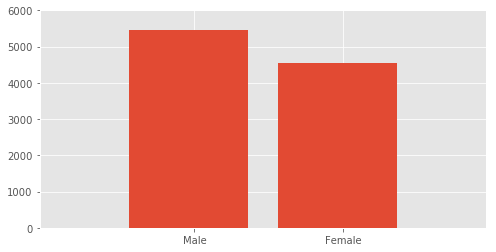

In [445]:
# Comparing the numbers of Males vs Females

plt.style.use ("ggplot")
from collections import Counter
c = Counter(my_dataset.Gender)

men = c['Male']
women = c['Female']

bar_heights = (men, women)
x_axis = (1,2)

fig, ax = plt.subplots()
width = 0.8

ax.bar(x_axis, bar_heights, width)

ax.set_xlim((0, 3))
ax.set_ylim((0, max(men, women)*1.1))

ax.set_xticks([i+width/20 for i in x_axis])
ax.set_xticklabels(['Male', 'Female'])

plt.show()

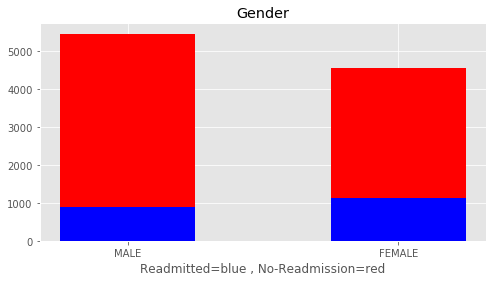

In [446]:
# Visualizing the actual numbers

A = [vis1, vis3]
B = [vis2, vis4]

x_axis = (1,2)

plt.bar(x_axis, A, color = 'b', width= 0.5)
plt.bar(x_axis, B, color = 'r', bottom = A, width= 0.5)

plt.title ('Gender')

plt.xticks ([i+width/20 for i in x_axis])
plt.xlabel ('Readmitted=blue , No-Readmission=red')
plt.xticks(x_axis)
plt.xticks([1, 2], ['MALE', 'FEMALE'])
plt.legend (loc= 1,bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2 )
plt.show()

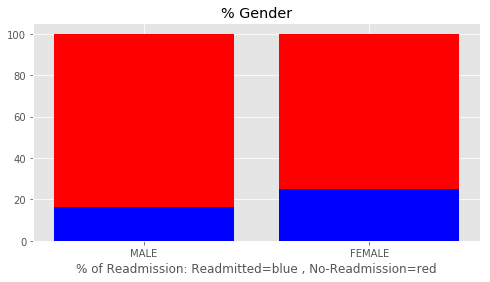

In [447]:
# Visualizing the percent
pool1 = vis1+vis2
vis1p = vis1 *100/pool1
vis2p = vis2*100/pool1
pool2 = vis3 +vis4
vis3p = vis3*100/pool2
vis4p = vis4*100/pool2
A = [vis1p, vis3p]
B = [vis2p, vis4p]

x_axis = (1,2)

plt.title ('% Gender')
plt.bar(x_axis, A, color = 'b')
plt.bar(x_axis, B, color = 'r', bottom = A)
plt.xlabel ('% of Readmission: Readmitted=blue , No-Readmission=red')

plt.xticks ([i+width/20 for i in x_axis])
plt.xticks(x_axis)
plt.xticks([1, 2], ['MALE', 'FEMALE'])
plt.legend (loc= 1,bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2 )

plt.show()

All other parameters can be visualized by the same method above

To be continued

In [448]:
# Logistic Regression
# Data Preprocessing
# 1) Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [449]:
# 2) Importing or selecting the important columns of the dataset
# subsetting columns
dataset = my_dataset [['HospitalLocation', 'Gender', 'Age', 'PreviousExpenses', \
                       'EstimatedExpenses', 'RegularCheckup', 'Readmited']]
dataset.head ()

,HospitalLocation,Gender,Age,PreviousExpenses,EstimatedExpenses,RegularCheckup,Readmited
0,Manhattan,Female,42,0.00,101348.88,1,1
1,StatenIsland,Female,41,83807.86,112542.58,1,0
2,Manhattan,Female,42,159660.80,113931.57,0,1
3,Manhattan,Female,39,0.00,93826.63,0,0
4,StatenIsland,Female,43,125510.82,79084.10,1,0


In [450]:
# creating matrix of features to identify the dependent factor vs independent factors (parameters)
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5]].values  # X = independent factors which are all columns except the last one
y = dataset.iloc[:, 6].values   # y = the dependent factor

In [451]:
X

array([['Manhattan', 'Female', 42, 0.0, 101348.88, 1],
       ['StatenIsland', 'Female', 41, 83807.86, 112542.58, 1],
       ['Manhattan', 'Female', 42, 159660.8, 113931.57, 0],
       ..., 
       ['Manhattan', 'Female', 36, 0.0, 42085.58, 1],
       ['Bronx', 'Male', 42, 75075.31, 92888.52, 0],
       ['Manhattan', 'Female', 28, 130142.79, 38190.78, 0]], dtype=object)

In [452]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [453]:
# 3) Taking care of missing data. Filling the missed data by the mean of the column
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 2:5])
X[:, 2:5] = imputer.transform(X[:, 2:5])

In [454]:
# 4) Encoding categorical data

# a) Encoding the Independent Variable/s
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # OneHotEncoder is for dummy encoding the encoded 
                                                              # variable by LabelEncoder
labelencoder_X = LabelEncoder()

X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

onehotencoder = OneHotEncoder(categorical_features = [[0, 1]])
X = onehotencoder.fit_transform(X).toarray()


# b) Encoding the Dependent Variable. Because it is already encoded, no need for y encoding
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

In [455]:
pd.DataFrame (X).head (10)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,1.0,0.0,42.0,0.00,101348.88,1.0
1,0.0,0.0,1.0,1.0,0.0,41.0,83807.86,112542.58,1.0
2,0.0,1.0,0.0,1.0,0.0,42.0,159660.80,113931.57,0.0
3,0.0,1.0,0.0,1.0,0.0,39.0,0.00,93826.63,0.0
4,0.0,0.0,1.0,1.0,0.0,43.0,125510.82,79084.10,1.0
5,0.0,0.0,1.0,0.0,1.0,44.0,113755.78,149756.71,0.0
6,0.0,1.0,0.0,0.0,1.0,50.0,0.00,10062.80,1.0
7,1.0,0.0,0.0,1.0,0.0,29.0,115046.74,119346.88,0.0
8,0.0,1.0,0.0,0.0,1.0,44.0,142051.07,74940.50,1.0
9,0.0,1.0,0.0,0.0,1.0,27.0,134603.88,71725.73,1.0


In [456]:
# 5) Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # you can ommit random_state. It 
# keeps the same random sample for all sampling trials OR you can choose different value.

In [457]:
# 6) Feature Scaling. This for bringing large and small values of different parameters on the same scale.
""" a) No need to feature scale the y (dependent) variable in binary outcome (logistic regression).Do it when the outcome is
continuous (linear regression).

b) There are 2 feature scaling methods, Standardization and Normalization.
Xstand = X - mean(X) / standard deviation(X)
Xnorm = X - min(X) / max(X) - min(X)

c) Even thought most python and R ML libraries do features scaling for you, some are not and then it is required to do it
manually. It is good practice to include feature scaling code in your script to remind youself this important processing step

d) Important note: feature scaling to dummy independent variables improve the model but loss the interpretation. Whereas, you
should not feature scale the dummy dependant variable"""
 
# Here we will use Standardisation Scale.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # X_train needs for fit and transform
X_test = sc_X.transform(X_test)       # X_test needs for only transform

# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.transform(y_test)

In [458]:
# pd.DataFrame (X)

In [459]:
# 7) Fitting classifier to the Training set
# A) Fitting Logistic Regression to the Training set
# Creating logestic regression class (classifier)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [460]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1534,   61],
       [ 312,   93]])

In [481]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.82646692,  0.80774032,  0.82125   ,  0.80875   ,  0.8075    ,
        0.78875   ,  0.82875   ,  0.8       ,  0.79849812,  0.81852315])

In [482]:
# B) Fitting KNN to the Training set
# Creating KNN class (classifier)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [483]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1479,  116],
       [ 238,  167]])

In [484]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.82771536,  0.80774032,  0.8125    ,  0.815     ,  0.805     ,
        0.80125   ,  0.8225    ,  0.8125    ,  0.80350438,  0.82853567])

In [485]:
# C) Fitting SVC to the Training set. The assumption is that the data is linearly separable.
# Creating SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [486]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [487]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.79525593,  0.79525593,  0.79625   ,  0.79625   ,  0.79625   ,
        0.79625   ,  0.79625   ,  0.79625   ,  0.79599499,  0.79599499])

In [488]:
# D) Fitting kernel SVC to the Training set. The assumption is that the data is NOT-linearly separable.
# Creating kernel SVC class (classifier)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [489]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1569,   26],
       [ 307,   98]])

In [490]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.84269663,  0.8289638 ,  0.83125   ,  0.83      ,  0.84      ,
        0.825     ,  0.84      ,  0.82375   ,  0.81977472,  0.83979975])

In [491]:
# E) Fitting Naive Bayes to the Training set.
# Creating Naive Bayes class (classifier)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB ()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [492]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1425,  170],
       [ 259,  146]])

In [493]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.79525593,  0.79775281,  0.78875   ,  0.79      ,  0.7975    ,
        0.7925    ,  0.81      ,  0.7825    ,  0.78222778,  0.8097622 ])

In [494]:
# F) Fitting Decision Tree Classification to the Training set. It does not need for features scaling because it is not
# Euclidean-based algorithm.
# Creating Decision Tree Classification class (classifier)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [495]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1366,  229],
       [ 223,  182]])

In [496]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.76404494,  0.75031211,  0.7625    ,  0.75125   ,  0.77375   ,
        0.72375   ,  0.75625   ,  0.74625   ,  0.74468085,  0.77346683])

In [497]:
# G) Fitting Random Forest Classification to the Training set. It does not need for features scaling because it is not
# Euclidean-based algorithm.
# Creating Random Forest Classification class (classifier)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier (n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [498]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1495,  100],
       [ 265,  140]])

In [499]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([ 0.82646692,  0.80774032,  0.82125   ,  0.80875   ,  0.8075    ,
        0.78875   ,  0.82875   ,  0.8       ,  0.79849812,  0.81852315])

In [ ]:
"""# 9) Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Expenses')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Expenses')
plt.legend()
plt.show()"""